# Chapter 4 - Functional Techniques in Python
<h4> Learning objectives:</h4>
<li>use functions as first class objects <p> Functions are like any other object and can be passed to functions, assigned to vars and included in lists</p></li>
<li>Define Function partials </li>


<li>Define higher-oreder functions <p> able to define or modify other functions </p></li>


<h3> Python module/package imports for this chapter</h3?

In [4]:
import sys, os, math, random, functools

import numpy as np

import matplotlib
import matplotlib.pyplot as pp
import matplotlib.animation as anim

%matplotlib inline

from IPython.display import display, HTML

### Code from previous videos (enhanced)

In [5]:
from turtle import Turtle, Terrarium

## Making fractals with functional Python


In [6]:
def snowflake(turtle,dist,level):
    for i in range(3):
        drawkoch(turtle,dist,level)
        turtle.right(120)

def drawkoch(turtle,distance,level):
    if level == 0:
        turtle.forward(distance)
    else:
        drawkoch(turtle,distance/3,level-1)
        turtle.left(60)
        drawkoch(turtle,distance/3,level-1)
        turtle.left(-120)
        drawkoch(turtle,distance/3,level-1)
        turtle.left(60)
        drawkoch(turtle,distance/3,level-1)

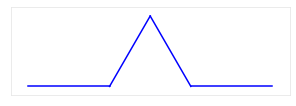

In [7]:
with Terrarium() as t:
    drawkoch(Turtle(t),100,1)

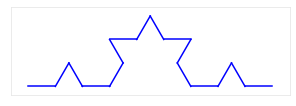

In [8]:
with Terrarium() as t:
    drawkoch(Turtle(t),100,2)

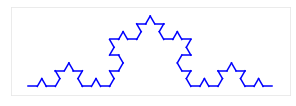

In [9]:
with Terrarium() as t:
    drawkoch(Turtle(t),100,3)

In [12]:
with Terrarium(animate=True) as t:
    drawkoch(Turtle(t),100,4)

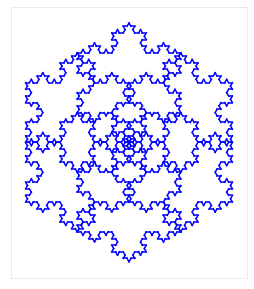

In [14]:
with Terrarium() as t:
    t1 = Turtle(t)
    
    def flake():
        snowflake(t1,30,3)
    def left():
        t1.left(60)  
        
    for f in (flake, left) * 6:
        f()

In [ ]:
def over(a,b):
    return a/b


In [16]:
inverse = functools.partial(over,1)
half = functools.partial(over,b=2)



In [17]:
inverse(2)

0.5

In [18]:
half(3)

1.5

In [19]:
inverse

functools.partial(<function over at 0x000001F915AAA288>, 1)

In [20]:
#Create two partials to represent turtle movements, forward & left
def F(dist):
    return functools.partial(Turtle.forward,distance=dist)

def L(ang):
    return functools.partial(Turtle.left,angle=ang)

In [23]:
f100 = F(100)

with Terrarium() as t:
    f100(Turtle(t))

In [33]:
def funckoch(steps):
    newsteps = []
    
    for step in steps:
        if step.func is Turtle.forward:
            F3 = F(step.keywords['distance']/3)
            newsteps += (F3, L(60), F3, L(-120), F3,L(60),F3)
        else:
            newsteps += (step)
            
        return newsteps

In [36]:
step0 = [F(100)]
funckoch(step0)

[functools.partial(<function Turtle.forward at 0x000001F914C9FD38>, distance=33.333333333333336),
 functools.partial(<function Turtle.left at 0x000001F914C9FE58>, angle=60),
 functools.partial(<function Turtle.forward at 0x000001F914C9FD38>, distance=33.333333333333336),
 functools.partial(<function Turtle.left at 0x000001F914C9FE58>, angle=-120),
 functools.partial(<function Turtle.forward at 0x000001F914C9FD38>, distance=33.333333333333336),
 functools.partial(<function Turtle.left at 0x000001F914C9FE58>, angle=60),
 functools.partial(<function Turtle.forward at 0x000001F914C9FD38>, distance=33.333333333333336)]

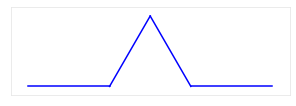

In [37]:
with Terrarium() as t:
    t1 = Turtle(t)
    
    for f in funckoch(funckoch(funckoch(step0))):
        f(t1)

In [46]:
#Higher  order Function

def iterater(f,n):
    def iterf(arg):
        ret = arg
        for i in range(n):
            ret = f(ret)
    return iterf

In [47]:
def turtle_map(self, steps):
    for step in steps:
        step(self)
    
Turtle.map = turtle_map

TypeError: 'NoneType' object is not iterable

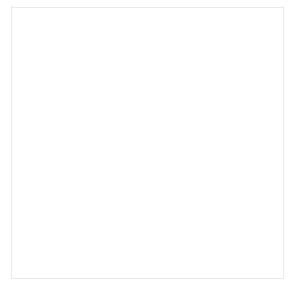

In [48]:
with Terrarium() as t:
    Turtle(t).map(iterater(funckoch,5)(step0))

In [49]:
triangle = [F(100), L(-100),F(100),L(-120),F(100)]

In [ ]:
with Terrarium(animate=True,duration=2) as t:
    Turtle(t).map(iterater(funckoch,5)(step0))